Laura, Luisa, Ahmed, Kia

id           0
'age'        9
'bp'        12
'sg'        47
'al'        46
'su'        49
'rbc'      152
'pc'        65
'pcc'        4
'ba'         4
'bgr'       44
'bu'        19
'sc'        17
'sod'       87
'pot'       88
'hemo'      52
'pcv'       71
'wbcc'     106
'rbcc'     131
'htn'        2
'dm'         2
'cad'        2
'appet'      1
'pe'         1
'ane'        1
'class'      0
dtype: int64
                id 'age' 'bp'   'sg' 'al' 'su'   'rbc'    'pc'       'pcc'  \
count   400.000000   391  388    353  354  351     248     335         396   
unique         NaN    76   10      5    6    6       2       2           2   
top            NaN    60   80  1.020    0    0  normal  normal  notpresent   
freq           NaN    19  116    106  199  290     201     259         354   
mean    200.500000   NaN  NaN    NaN  NaN  NaN     NaN     NaN         NaN   
std     115.614301   NaN  NaN    NaN  NaN  NaN     NaN     NaN         NaN   
min       1.000000   NaN  NaN    NaN  NaN  NaN     

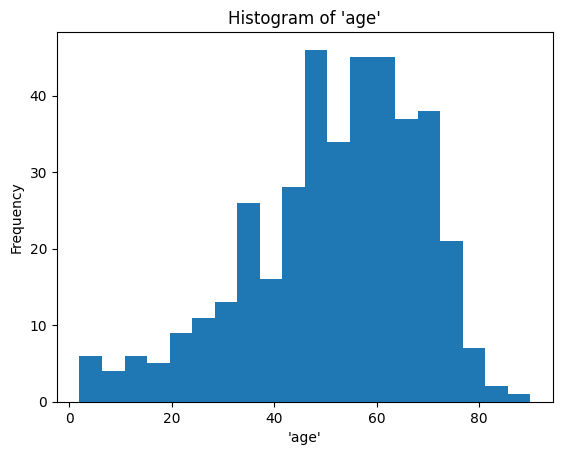

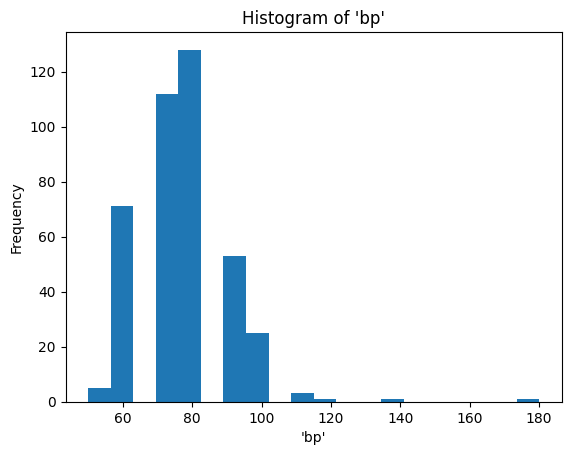

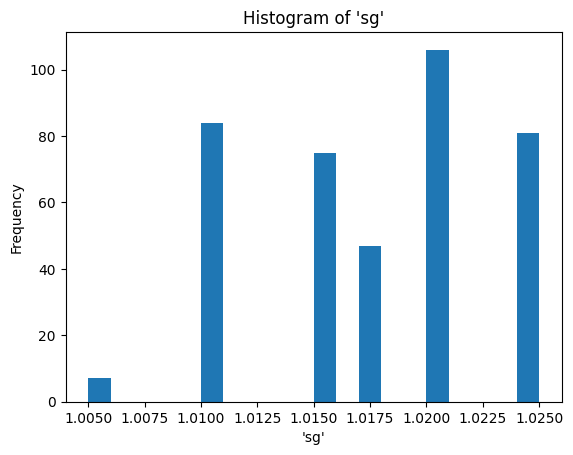

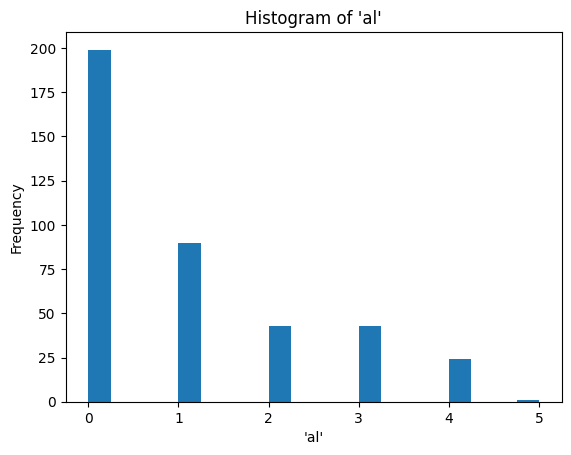

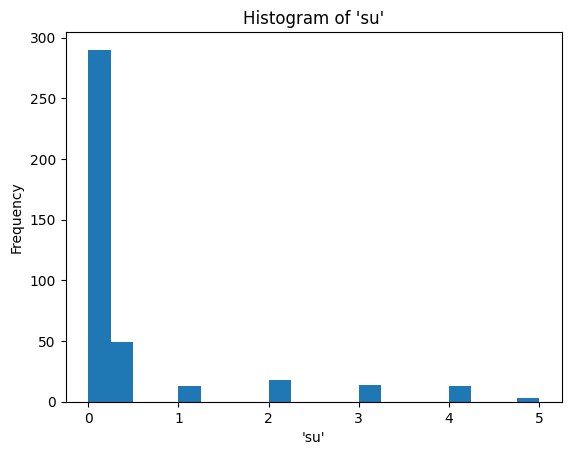

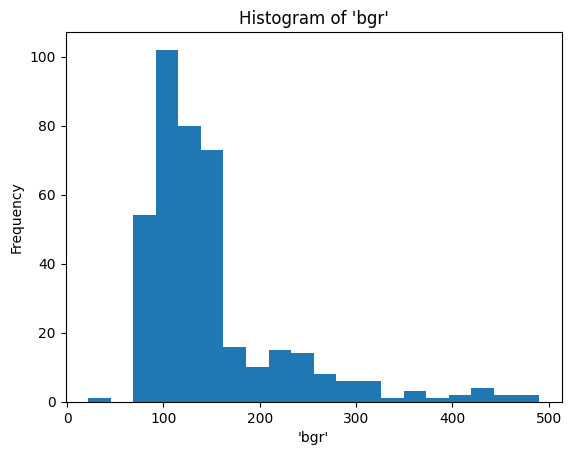

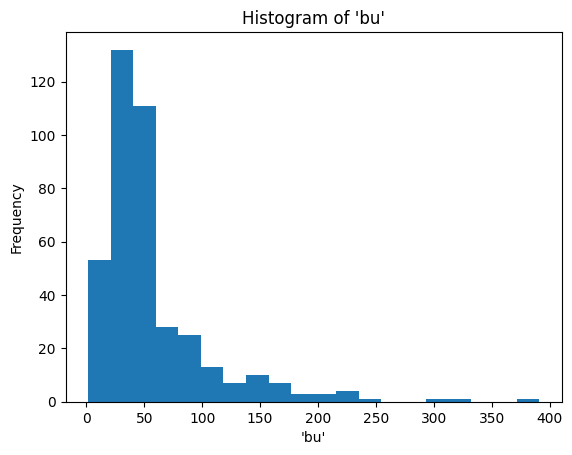

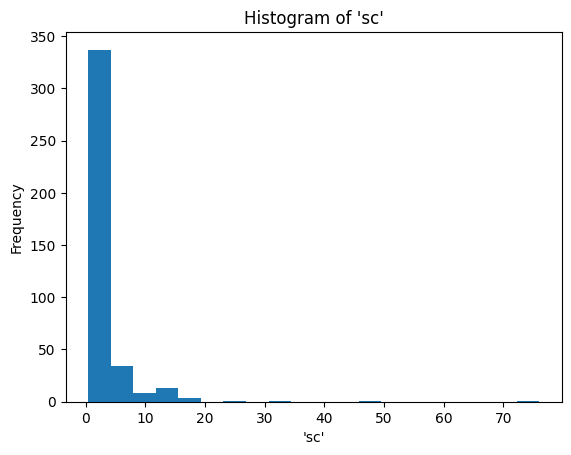

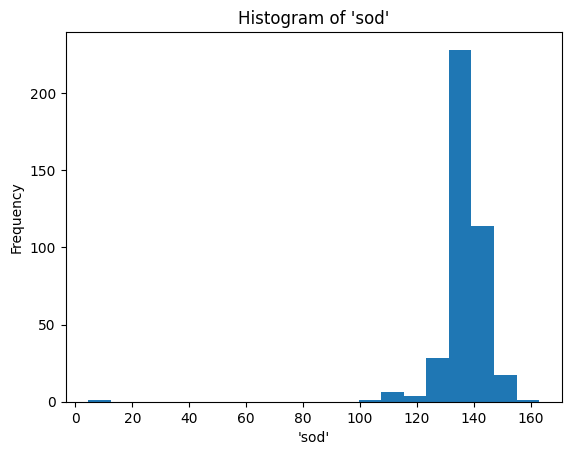

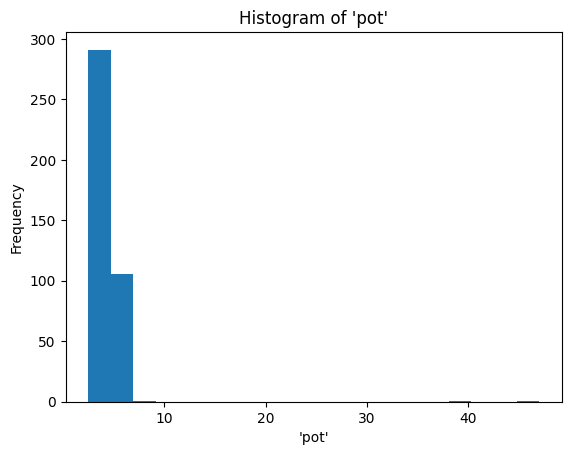

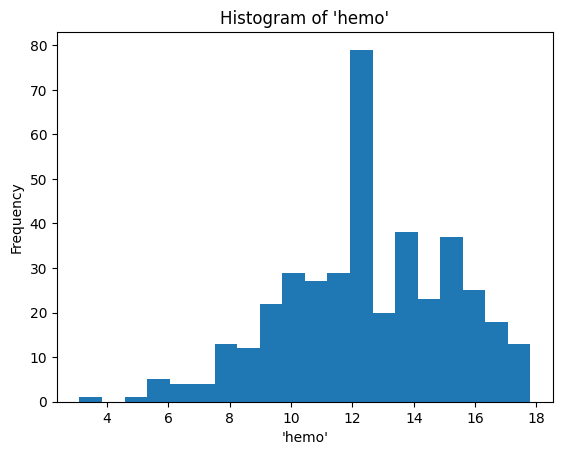

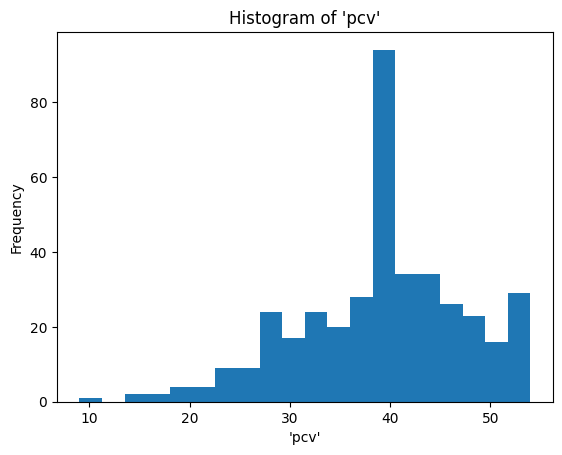

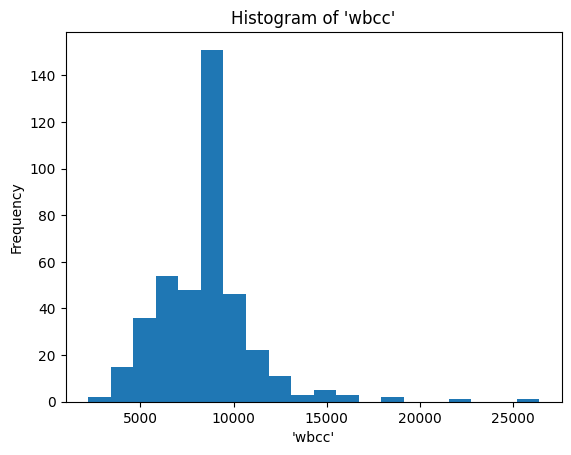

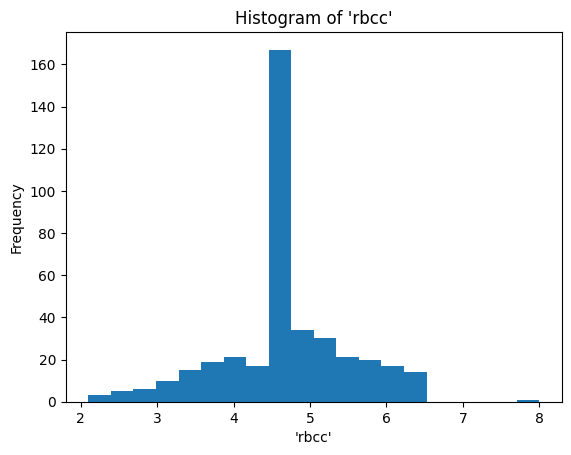

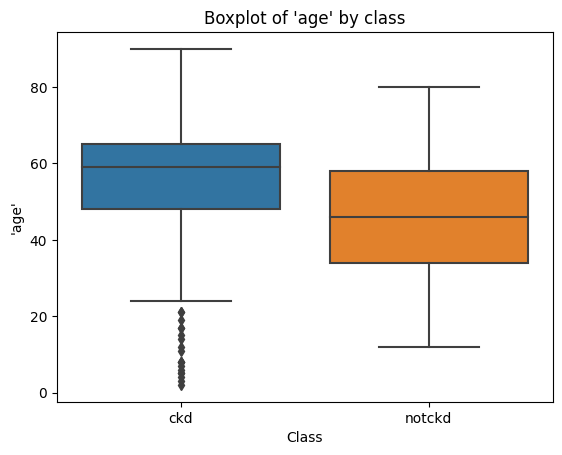

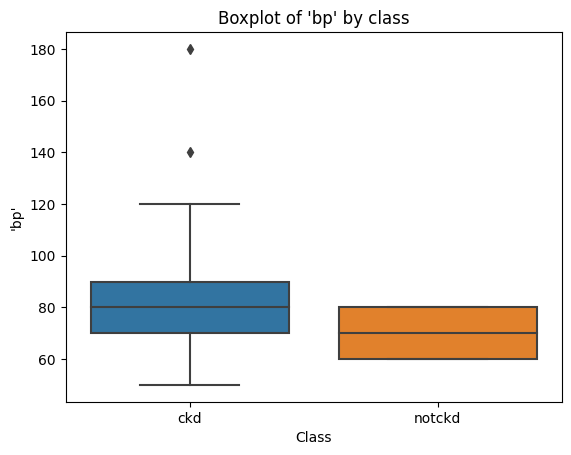

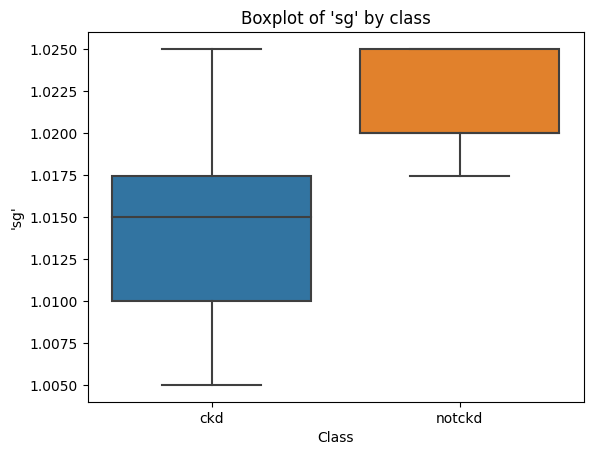

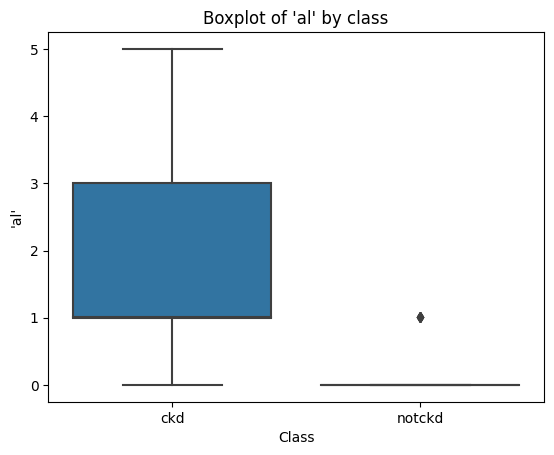

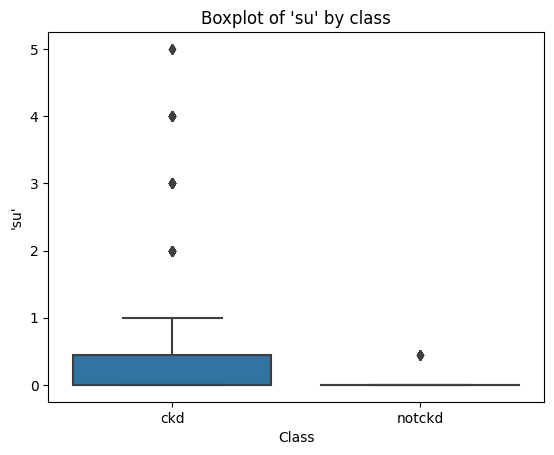

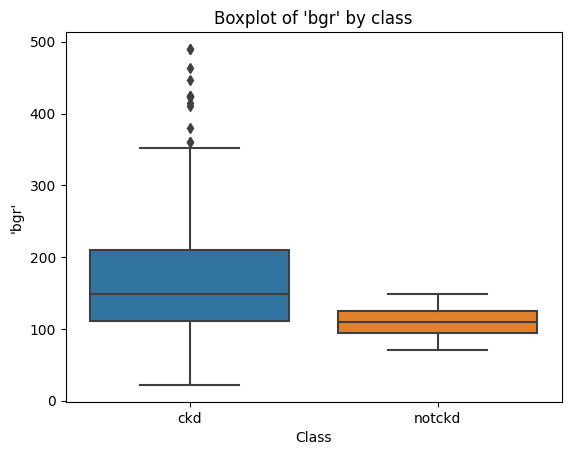

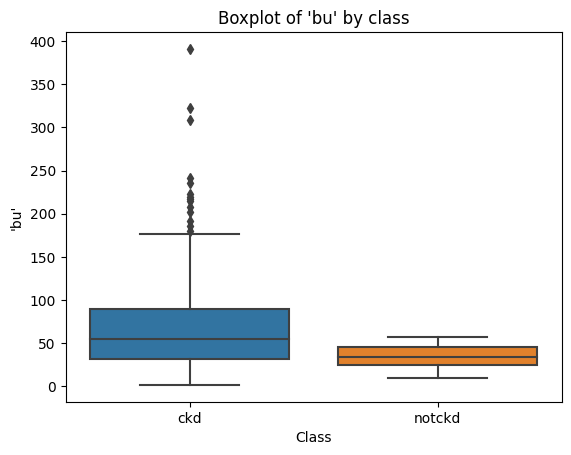

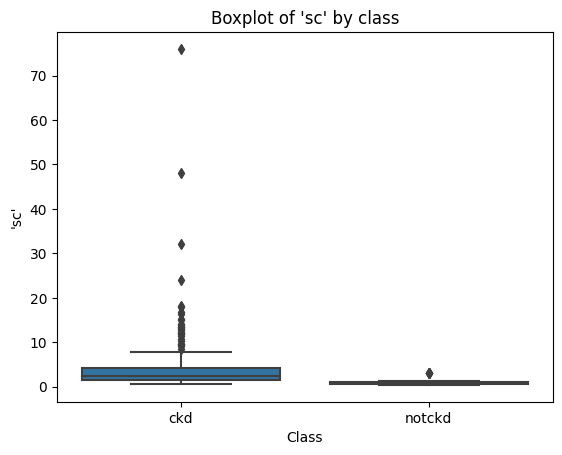

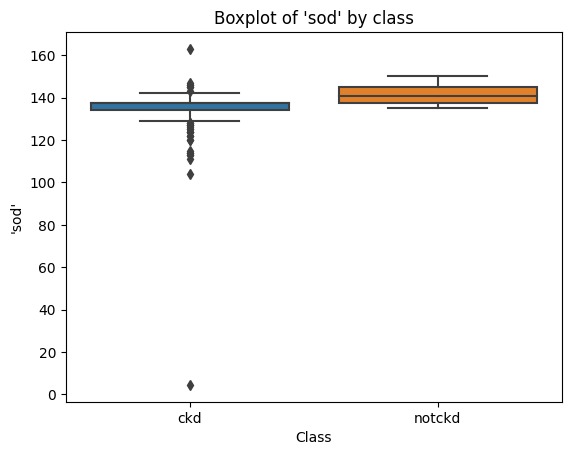

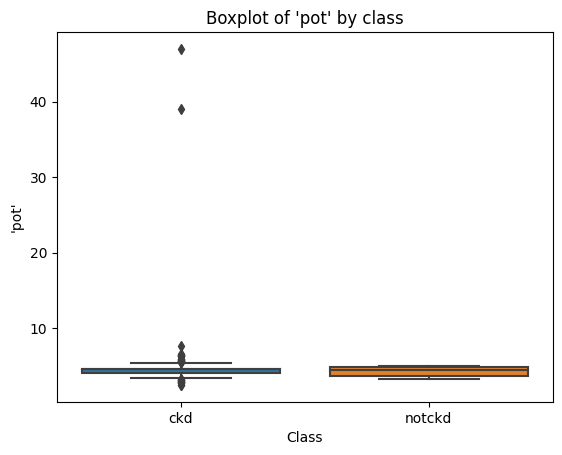

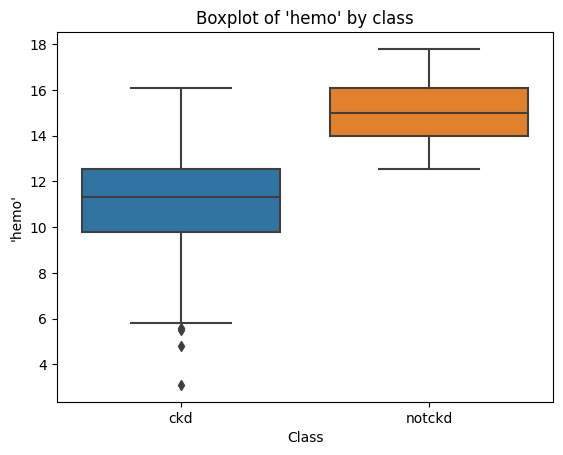

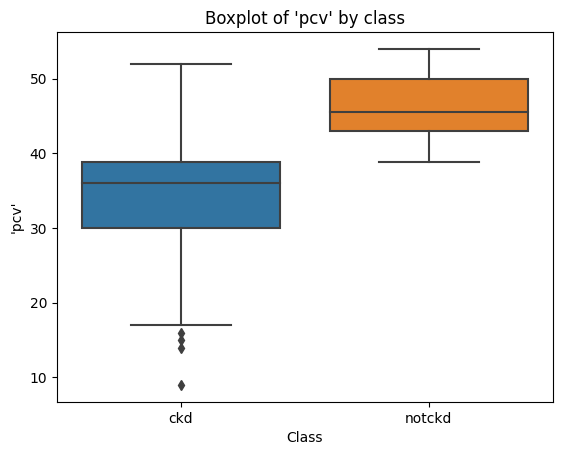

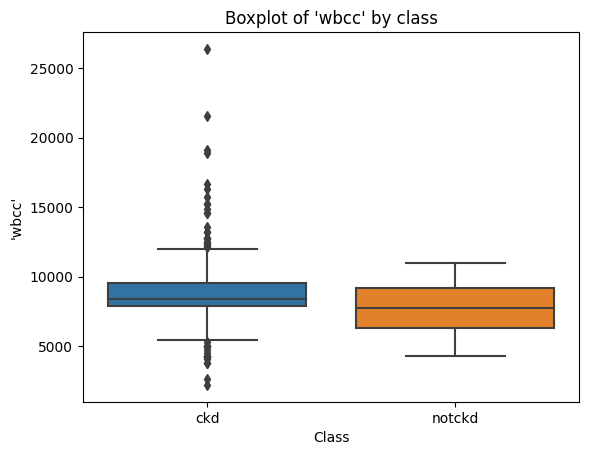

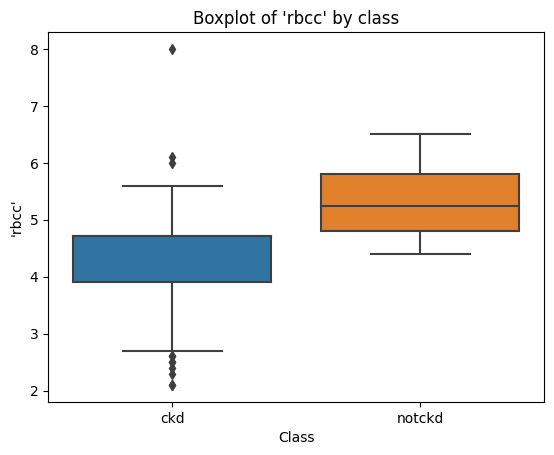

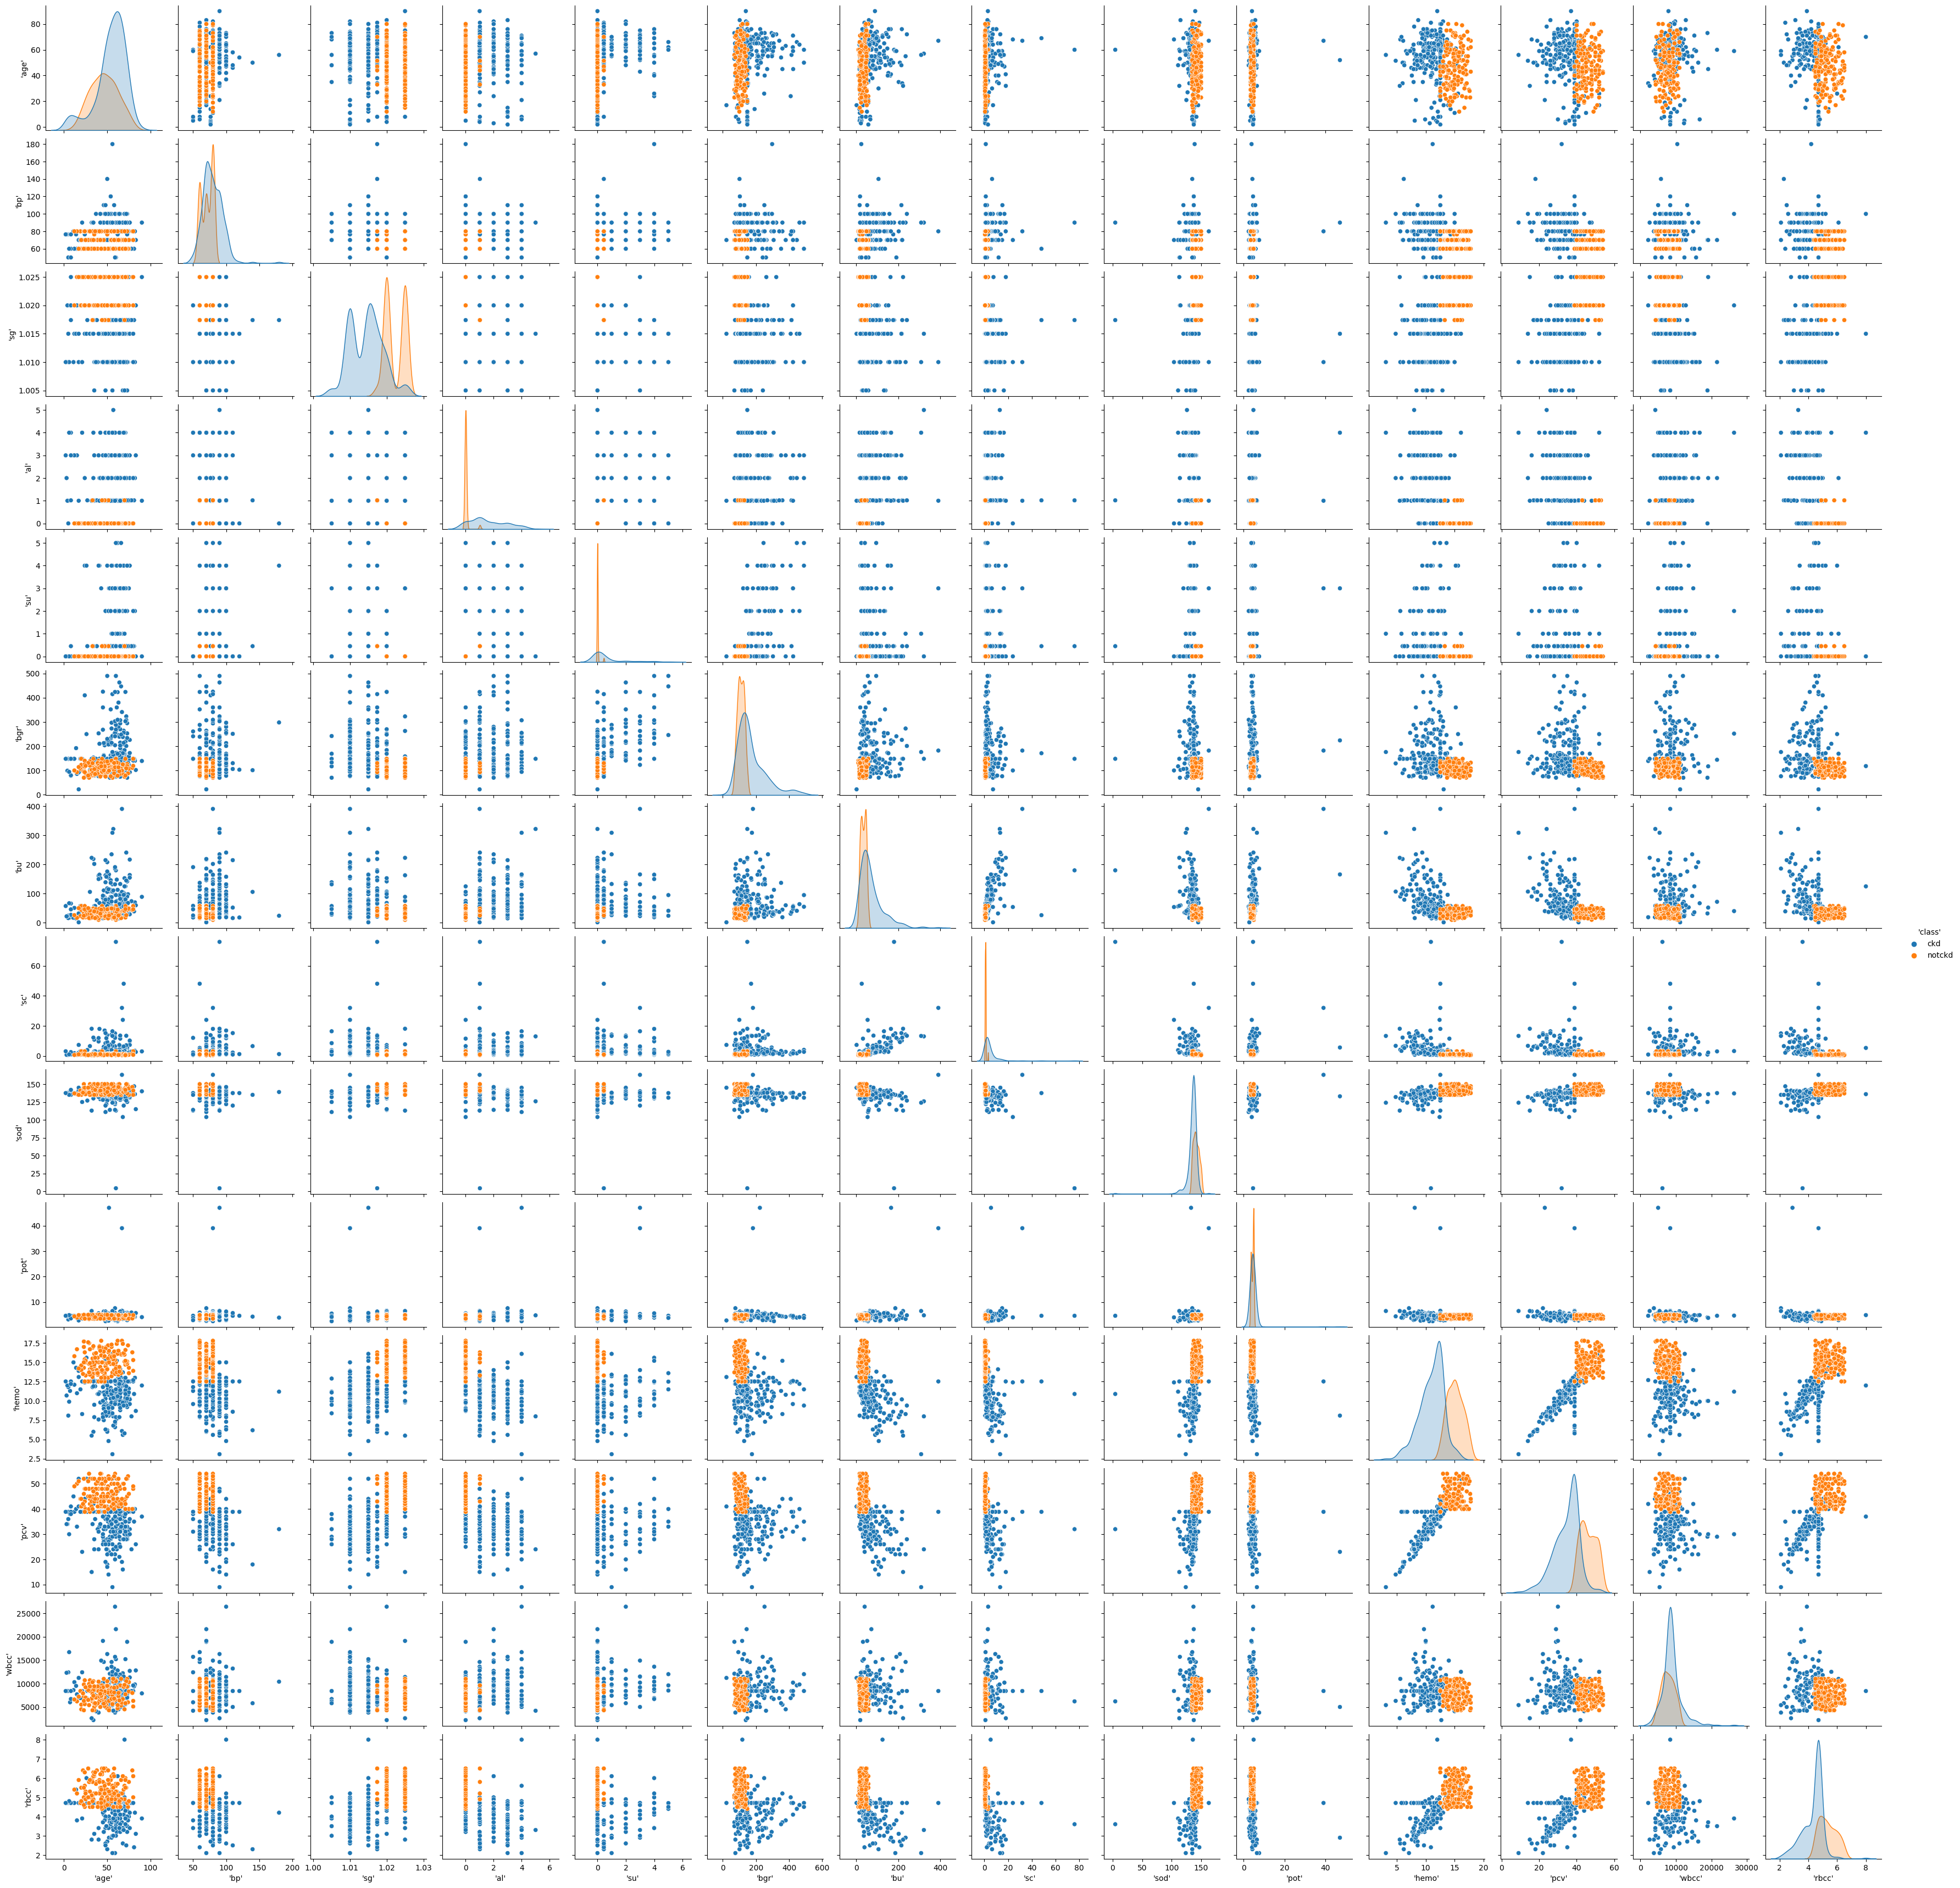

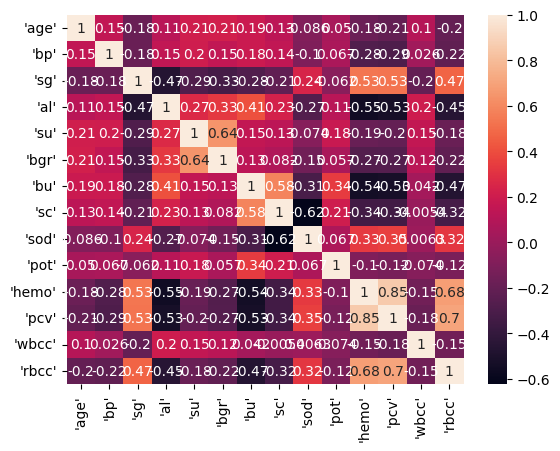

In [ ]:
# Load the dataset
df = pd.read_csv("chronic_kidney_disease.csv")

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Define numeric and categorical columns with the correct column names
numeric_columns = ["'age'", "'bp'", "'sg'", "'al'", "'su'", "'bgr'", "'bu'", "'sc'", "'sod'", "'pot'", "'hemo'", "'pcv'", "'wbcc'", "'rbcc'"]
categorical_columns = ["'rbc'", "'pc'", "'pcc'", "'ba'", "'htn'", "'dm'", "'cad'", "'appet'", "'pe'", "'ane'", "'class'"]

# Generate summary statistics with NaN included
print(df.describe(include='all'))

# Impute missing values
from sklearn.impute import SimpleImputer

# For numeric columns, use the mean imputation method
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# For categorical columns, use the most frequent value imputation method
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Generate summary statistics without NaN
print(df.describe(include='all'))

# Visualizations
# Histograms
for col in numeric_columns:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots
for col in numeric_columns:
    plt.figure()
    sns.boxplot(x="'class'", y=col, data=df)
    plt.title(f'Boxplot of {col} by class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.show()

# Pairplot
sns.pairplot(df, hue="'class'", vars=numeric_columns)
plt.show()

# Correlation heatmap
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
!pip install rarfile
!pip install scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import requests
import io
import rarfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim

# Download the RAR file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar"
rar_file = requests.get(url).content

# Extract the ARFF file from the RAR file
with rarfile.RarFile(io.BytesIO(rar_file)) as rf:
    arff_file = rf.read("Chronic_Kidney_Disease/chronic_kidney_disease.arff")

# Decode the ARFF file bytes into a string
arff_file_decoded = arff_file.decode('utf-8')

# Replace 'yes' and 'no' with 'true' and 'false'
arff_file_decoded = arff_file_decoded.replace('yes', 'true')
arff_file_decoded = arff_file_decoded.replace('no', 'false')

# Remove the attribute lines before the @data tag
arff_file_decoded = arff_file_decoded.split('@data', 1)[1]

# Remove any lines with more than 24 columns
arff_data = [line.strip().split(',') for line in arff_file_decoded.split('\n') if line.strip() and len(line.strip().split(',')) <= 25]

# Load the modified ARFF file into a pandas DataFrame
df = pd.DataFrame(arff_data)

# Assign column names to the DataFrame
df.columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

# Replace '?' with NaN
df = df.replace('?', pd.np.nan)


<ipython-input-72-fd7fa91e5e7b>:41: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = df.replace('?', pd.np.nan)


In [ ]:
from google.colab import files
uploades = files.upload()

Saving kidney_disease-1.csv to kidney_disease-1.csv


In [ ]:
import pandas as pd

df = pd.read_csv("kidney_disease-1.csv")

# Drop all rows with missing values
df = df.dropna()

# Get a summary of the numerical columns in the dataframe
summary = df.describe()

# Get a summary of the categorical columns in the dataframe
cat_summary = df.describe(include=['O'])

print(summary)


               id         age          bp          sg          al          su  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean   274.841772   49.563291   74.050633    1.019873    0.797468    0.253165   
std    102.998517   15.512244   11.175381    0.005499    1.413130    0.813397   
min      3.000000    6.000000   50.000000    1.005000    0.000000    0.000000   
25%    243.000000   39.250000   60.000000    1.020000    0.000000    0.000000   
50%    298.500000   50.500000   80.000000    1.020000    0.000000    0.000000   
75%    355.750000   60.000000   80.000000    1.025000    1.000000    0.000000   
max    399.000000   83.000000  110.000000    1.025000    4.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000  
mean   131.341772   52.575949    2.188608  138.848101    4.636709   13.687342  
std     64.939832   47.395382 

In [ ]:

print(cat_summary)


           rbc      pc         pcc          ba  pcv    wc   rc  htn   dm  cad  \
count      158     158         158         158  158   158  158  158  158  158   
unique       2       2           2           2   34    71   41    2    2    2   
top     normal  normal  notpresent  notpresent   52  6700  4.5   no   no   no   
freq       140     129         144         146   15     7   12  124  130  147   

       appet   pe  ane classification  
count    158  158  158            158  
unique     2    2    2              2  
top     good   no   no         notckd  
freq     139  138  142            115  


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv("kidney_disease-1.csv")

# Drop all rows with missing values
df = df.dropna()

# Encode categorical variables using one-hot encoding
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_cols)], remainder='passthrough')
df = transformer.fit_transform(df)

# Separate the features and target variable
X = df[:, :-1]
y = df[:, -1]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
num_cols = [1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15]
scaler = StandardScaler()
X_train[:, num_cols] = scaler.fit_transform(X_train[:, num_cols])
X_test[:, num_cols] = scaler.transform(X_test[:, num_cols])

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network model
class KidneyDiseaseClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initialize the model
model = KidneyDiseaseClassifier()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = y_pred.round()
    accuracy = (y_pred_class == y_test).sum() / y_test.shape[0]
    print(f"Accuracy: {accuracy.item():.4f}")


TypeError: ignored

In [ ]:
# Convert the data to numpy arrays
X = df.drop('class', axis=1).values
y = df['class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Impute missing values with median
median = X_train.median()
X_train = X_train.fillna(median)
X_test = X_test.fillna(median)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train.values.astype(float))
X_test = torch.tensor(X_test.values.astype(float))
y_train = torch.tensor(y_train.values.astype(float))
y_test = torch.tensor(y_test.values.astype(float))


<ipython-input-48-0e652e1f68db>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = X_train.median()


ValueError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame
# ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train.values.astype(float))
X_test = torch.tensor(X_test.values.astype(float))
y_train = torch.tensor(y_train.values.astype(float))
y_test = torch.tensor(y_test.values.astype(float))

# Define the neural network architecture
class CKDNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(24, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the neural network
net = CKDNet()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Train the neural network
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(X_train.float())
    loss = criterion(outputs, y_train.view(-1, 1).float())
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {loss.item()}")

# Evaluate the neural network on the test set
with torch.no_grad():
    outputs = net(X_test.float())
    predicted = torch.round(outputs)
    accuracy = (predicted == y_test.view(-1, 1)).sum().item() / len(y_test)
    print(f"Accuracy: {accuracy}")


ValueError: ignored